# Breast cancer detection using SVM

### Group-57 Abu BHUIYAN (U3259895)  and  Semun GURUNG


## Data Retrieving

In [1]:
from sklearn.datasets import load_breast_cancer

breast_cancer_dataset = load_breast_cancer()

In [2]:
breast_cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
breast_cancer_dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
breast_cancer_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Data Exploration

In [5]:
breast_cancer_dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
breast_cancer_dataset.data.shape

(569, 30)

In [7]:
breast_cancer_dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
breast_cancer_dataset.target.shape

(569,)

## Split these feature vectors into a trainning and testing sets

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_dataset.data, breast_cancer_dataset.target, test_size = 0.2, random_state = 42)

In [10]:
X_train.shape

(455, 30)

In [11]:
X_test.shape

(114, 30)

In [12]:
y_train.shape

(455,)

In [13]:
y_test.shape

(114,)

## Build a SVM model

In [14]:
# import support vector classification model
from sklearn.svm import SVC

model = SVC()

## Training the model and make a prediction

In [15]:
model.fit(X_train, y_train)

SVC()

In [16]:
y_pred = model.predict(X_test)

## Evaluate the model

In [17]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy: 0.9473684210526315
Precision: 0.9514695830485304
Recall: 0.9473684210526315
F1-score: 0.9464615931721194


**The Classification report**

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test, y_pred, target_names=breast_cancer_dataset.target_names))

              precision    recall  f1-score   support

   malignant       1.00      0.86      0.93        43
      benign       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



**Confusion matrix visualization with heatmap**

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt

Text(136.97222222222223, 0.5, 'Predicted label')

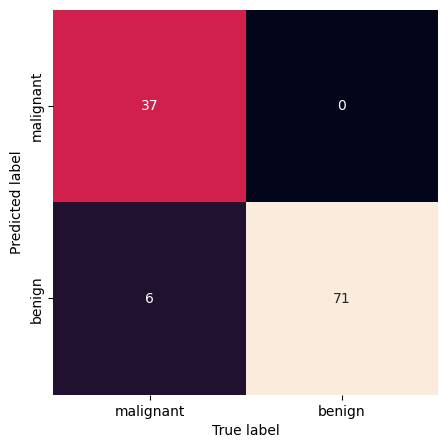

In [22]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=breast_cancer_dataset.target_names,
yticklabels=breast_cancer_dataset.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [23]:
params = model.get_params()

In [24]:
params

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Parameters Tunning
Finally, we can use a grid search cross-validation to explore combinations of parameters.Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function (RBF) kernel), and determine the best model:

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
model = SVC()

param_grid = [{'C': [0.5, 0.1, 1, 5, 10], 'kernel': ['linear'], 'class_weight': ['balanced']},
  {'C': [0.5, 0.1, 1, 5, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.005, 0.05, 0.5], 
   'kernel': ['rbf'], 'class_weight': ['balanced']}]

param_grid = [
    {
        'C': [0.01, 0.1, 1, 10, 100],  # Adjusted range for better exploration
        'kernel': ['linear'],  # Linear kernel for simpler relationships
        'class_weight': ['balanced']  # To handle imbalanced classes
    },
    {
        'C': [0.01, 0.1, 1, 10, 100],  # Wider range for regularization
        'gamma': [0.0001, 0.001, 0.01, 0.1, 1],  # Adjusted gamma values for RBF
        'kernel': ['rbf'],  # RBF kernel for more complex non-linear relationships
        'class_weight': ['balanced']  # Addressing class imbalance
    }
]


In [27]:
param_grid = [
    {'C': [0.5, 0.1, 1, 5, 10], 'kernel': ['linear'], 'class_weight': ['balanced']},
    {'C': [0.5, 0.1, 1, 5, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.005, 0.05, 0.5, 1, 5, 10], 'kernel': ['rbf'], 'class_weight': ['balanced']},
    {'C': [0.5, 0.1, 1, 5, 10], 'degree': [2, 3, 4, 5], 'kernel': ['poly'], 'coef0': [0, 1, 2, 3], 'class_weight': ['balanced']},
    {'C': [0.5, 0.1, 1, 5, 10], 'kernel': ['sigmoid'], 'coef0': [0, 1, 2, 3], 'class_weight': ['balanced']}
]

**Running the Grid Search on parameters and fit the trainning data**

In [28]:
grs = GridSearchCV(model, param_grid)

**Output the best values**

In [29]:
grs.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.5, 0.1, 1, 5, 10],
                          'class_weight': ['balanced'], 'kernel': ['linear']},
                         {'C': [0.5, 0.1, 1, 5, 10],
                          'class_weight': ['balanced'],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.005, 0.05, 0.5,
                                    1, 5, 10],
                          'kernel': ['rbf']},
                         {'C': [0.5, 0.1, 1, 5, 10],
                          'class_weight': ['balanced'], 'coef0': [0, 1, 2, 3],
                          'degree': [2, 3, 4, 5], 'kernel': ['poly']},
                         {'C': [0.5, 0.1, 1, 5, 10],
                          'class_weight': ['balanced'], 'coef0': [0, 1, 2, 3],
                          'kernel': ['sigmoid']}])

In [30]:
print("Best Hyper Parameters:",grs.best_params_)

Best Hyper Parameters: {'C': 5, 'class_weight': 'balanced', 'kernel': 'linear'}


In [31]:
model_best = grs.best_estimator_

In [32]:
print("Best kernel:", model_best.kernel)

Best kernel: linear


In [33]:
y_pred = model_best.predict(X_test)

**Evaluate the model**

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy: 0.9473684210526315
Precision: 0.9484193575726757
Recall: 0.9473684210526315
F1-score: 0.9475905673274094


Text(149.72222222222223, 0.5, 'Predicted label')

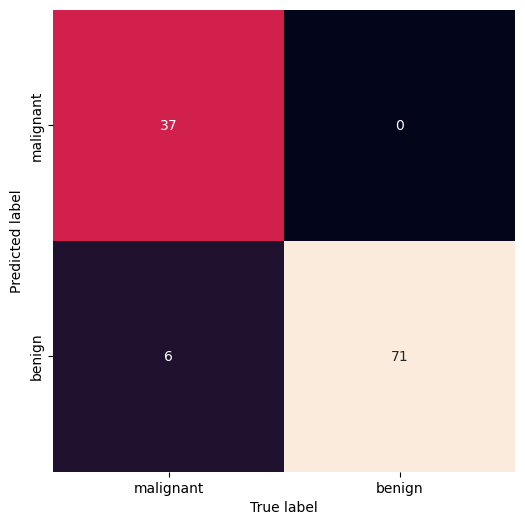

In [35]:
plt.figure(figsize=(8,6))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=breast_cancer_dataset.target_names,
yticklabels=breast_cancer_dataset.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')

## Why parameter tuning didn't show improvement ?

The fact that the best hyperparameters found for the SVM-BC model were C=5, class_weight='balanced', and kernel='linear' suggests that the model was already performing well with the default parameters.The selection of a linear kernel and the modest effect of the C parameter likely means the breast cancer dataset’s relationships between features and labels are well-suited for a simpler linear model, making additional hyperparameter tuning provide only marginal improvements.If all the features in the dataset are already providing the essential information to the SVM model, further tuning of hyperparameters might not extract any additional performance.In cases where more feature engineering or selection might be needed, hyperparameter tuning alone wouldn’t drastically improve the model’s performance. Further gains in performance may require either more complex data (with non-linear relationships), better feature engineering, or a completely different modeling approach.The model may have already reached a point of performance saturation. This means that no matter how much you tune the hyperparameters, you won’t achieve a significant boost beyond a certain point because the SVM's capacity to separate the classes might already be maximized.

Other models like Random Forest,KNN or Neural Networks  may perform better than SVM depending on the nature of the dataset, the features, and the complexity of the problem.